# Prepare training and validation set
Validation set is required to debug the whole training process. Besides, for Kaggle competitions, validation set is used to estimate the model performance on the test set before submission.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

## get the full training set

In [2]:
train_df = pd.read_csv('data/labels.csv')
print(train_df.shape)
display(train_df.head())

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### prepare numeric labels for training set

In [3]:
uni_breeds_df = train_df[['breed']].drop_duplicates().sort_values('breed', ascending=True).reset_index(drop=True)
uni_breeds_df['breed_label'] = uni_breeds_df.index.values
train_df = train_df.merge(uni_breeds_df, on='breed', how='left')

print(train_df.shape)
print(train_df[train_df.breed_label.isnull()].shape)
print(train_df['breed_label'].min())
print(train_df['breed_label'].max())

(10222, 3)
(0, 3)
0
119


In [4]:
display(train_df.head())

,id,breed,breed_label
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


### save the prepared training set

In [5]:
# train_df.to_csv('processed_data/dog_breed_train_full.csv', index=False)

## stratified sampling for validation set
stratified sampling is better than random sampling when the classes are imbalanced

In [6]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=25, test_size=0.1)

In [7]:
train_df = train_df.reset_index(drop=True)

for train_index, valid_index in sss.split(X=train_df.index.values, y=train_df['breed_label'].values):
    train_train_df, train_valid_df = train_df.iloc[train_index], train_df.iloc[valid_index]
    
train_train_df = train_train_df.reset_index(drop=True)
train_valid_df = train_valid_df.reset_index(drop=True)

print(train_train_df.shape)
print(train_valid_df.shape)

(9199, 3)
(1023, 3)


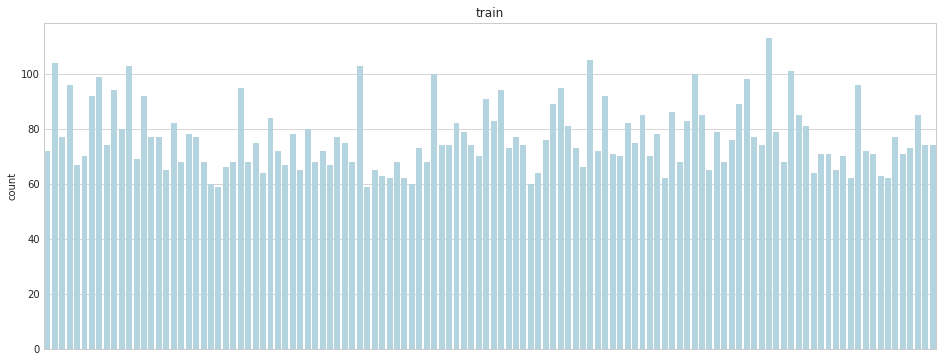

In [8]:
plt.figure(figsize=(16, 6))
sns.countplot(x=train_train_df['breed_label'].values, order=range(120), color='lightblue')
_ = plt.xticks([])
_ = plt.title('train')

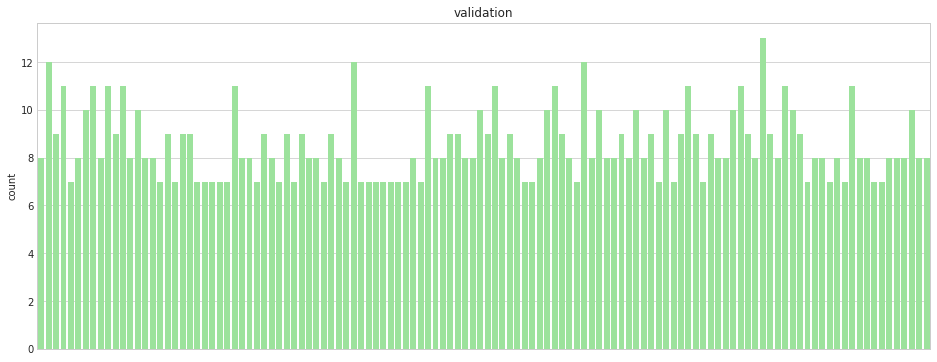

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(train_valid_df['breed_label'].values, order=range(120), color='lightgreen')
_ = plt.xticks([])
_ = plt.title('validation')

In [10]:
# train_train_df.to_csv('processed_data/train_train_dataset.csv', index=False)
# train_valid_df.to_csv('processed_data/train_valid_dataset.csv', index=False)

## prepare test dataset

In [11]:
sample_submission = pd.read_csv('data/sample_submission.csv')

print(sample_submission.shape)
display(sample_submission.head())

(10357, 121)


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [12]:
test_df = sample_submission[['id']]
print(test_df.shape)
display(test_df.head())

(10357, 1)


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


In [13]:
# test_df.to_csv('processed_data/test_dataset.csv', index=False)

## check the final structure

In [14]:
! tree processed_data

processed_data
├── dog_breed_bn_incep_v3_lr_avg5.csv
├── dog_breed_train_full.csv
├── extra_train_dataset.csv
├── test_dataset.csv
├── test_submit_fe_adam_10epoch_simple_0.001.csv
├── train_train_dataset.csv
├── train_train_dataset_more.csv
└── train_valid_dataset.csv

0 directories, 8 files
